In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import math
import string
import seaborn as sns
df1 = pd.read_csv('BankFAQs.csv')
df1

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
1768,Which languages do you speak,just English. But I'm trying to learn new lang...,accounts
1769,how much is interest for FD,7%,accounts
1770,how much is interest for Fixed Deposit,7%,accounts
1771,Fixed Deposit,7%,accounts


In [2]:
df1.shape

(1773, 3)

In [3]:
df1.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  1773 non-null   object
 1   Answer    1773 non-null   object
 2   Class     1773 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [5]:
df1.columns

Index(['Question', 'Answer', 'Class'], dtype='object')

In [6]:
df1.describe()

,Question,Answer,Class
count,1773,1773,1773
unique,1343,1446,7
top,How can I change the mode of repayment/ accoun...,Post Dated Cheques(PDCs)/Security Cheques subm...,insurance
freq,18,17,469


In [7]:
import pandas as pd ##  now read 2nd file of Q, A and Class
import numpy as np
df2 = pd.read_csv("Bank_QA_C.csv")
df2[:6]

,Question,Answer,Class
0,Does QA 22 Account continue under Foreign Exch...,No. With the introduction of Foreign Exchange ...,Commercial Banking
1,Can foreign nationals resident in India open r...,Yes. Foreign nationals resident in India can o...,Commercial Banking
2,Should banks have a separate system to monitor...,"From exchange control point of view, no monito...",Commercial Banking
3,Can ADs (banks) remit proceeds of such account...,Yes. But ADs (banks) should ensure that the fu...,Commercial Banking
4,In the absence of QA 22 account how the salary...,In terms of GOI notification No.SO.301(E) date...,Commercial Banking
5,Who can undertake remittance transactions betw...,Account-holders of the participating banks and...,Payment and Settlement System


In [8]:
df2.shape # no of row and columns is 30 rows × 3 columns

(30, 3)

In [9]:
df2.isnull().sum()

Question    0
Answer      0
Class       0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  30 non-null     object
 1   Answer    30 non-null     object
 2   Class     30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [11]:
df2.describe()

,Question,Answer,Class
count,30,30,30
unique,30,30,5
top,Does QA 22 Account continue under Foreign Exch...,No. With the introduction of Foreign Exchange ...,Issuer of Currency
freq,1,1,10


In [12]:
df2['Class'].unique()

array(['Commercial Banking', 'Payment and Settlement System',
       'Co-operative Banking', 'Consumer Education and Protection',
       'Issuer of Currency'], dtype=object)

In [13]:
df_result = df1.append((df2), ignore_index = True)
df_result

C:\Users\omgha\AppData\Local\Temp\ipykernel_13364\604953225.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df1.append((df2), ignore_index = True)


,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
1798,What is currency paper made up of?,The paper currently being used for printing of...,Issuer of Currency
1799,How many languages appear in the language pane...,Fifteen languages are appearing in the languag...,Issuer of Currency
1800,Is it possible to have two or more banknotes w...,"Yes, it is possible to have two or more bankno...",Issuer of Currency
1801,Who decides on the figure to be printed on a n...,"In terms of Section 25 of the RBI Act, the des...",Issuer of Currency


In [14]:
df_result.shape

(1803, 3)

In [15]:
## we simply export a Dataframe to a CSV file using df.to_csv().
df_result.to_csv('df_result_ofdf1plusdf2_index.csv')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\omgha\AppData\Local\Temp\ipykernel_13364\3555066798.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [17]:
# genrate report
profile = ProfileReport(df_result)
profile.to_file(output_file= "Banking_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# show the report, refer the html file put in the cmmon drive
profile

In [19]:
df_result['Class'].value_counts()

insurance                            469
cards                                403
loans                                375
accounts                             315
investments                          140
security                              57
fundstransfer                         14
Issuer of Currency                    10
Payment and Settlement System          6
Commercial Banking                     5
Co-operative Banking                   5
Consumer Education and Protection      4
Name: Class, dtype: int64

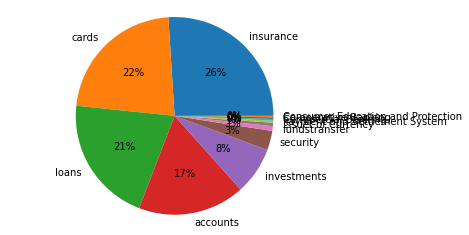

In [20]:
# Data is Clean, Lets jump to Visualization
value_counts= df_result['Class'].value_counts()
plt.pie(value_counts.values,labels = value_counts.index,autopct='%1.0f%%')
plt.axis('equal')
plt.show()

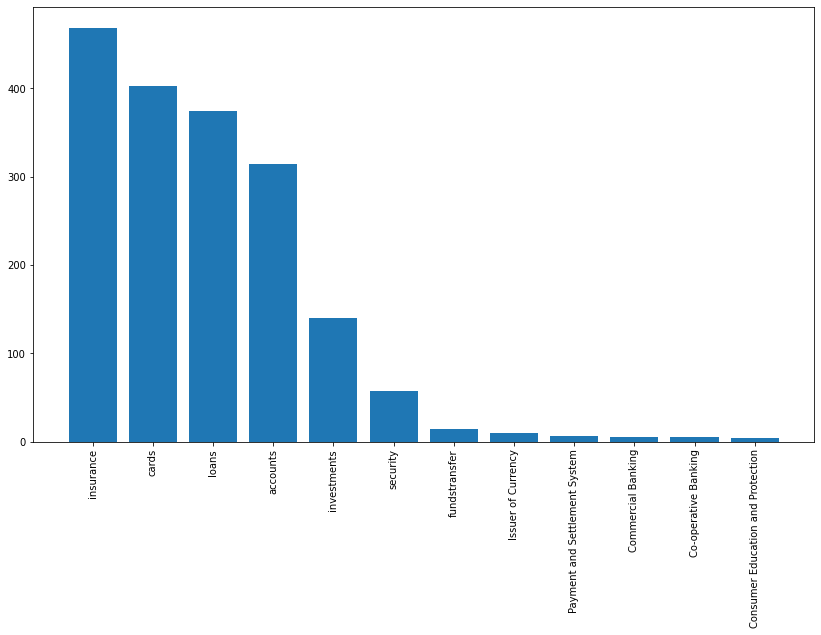

In [21]:
# Data is Clean, Lets jump to Visualization

value_counts= df_result['Class'].value_counts()
plt.figure(figsize = (14,8))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=90)
plt.show()

C:\Users\omgha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'accounts'),
  Text(1, 0, 'cards'),
  Text(2, 0, 'fundstransfer'),
  Text(3, 0, 'insurance'),
  Text(4, 0, 'investments'),
  Text(5, 0, 'loans'),
  Text(6, 0, 'security'),
  Text(7, 0, 'Commercial Banking'),
  Text(8, 0, 'Payment and Settlement System'),
  Text(9, 0, 'Co-operative Banking'),
  Text(10, 0, 'Consumer Education and Protection'),
  Text(11, 0, 'Issuer of Currency')])

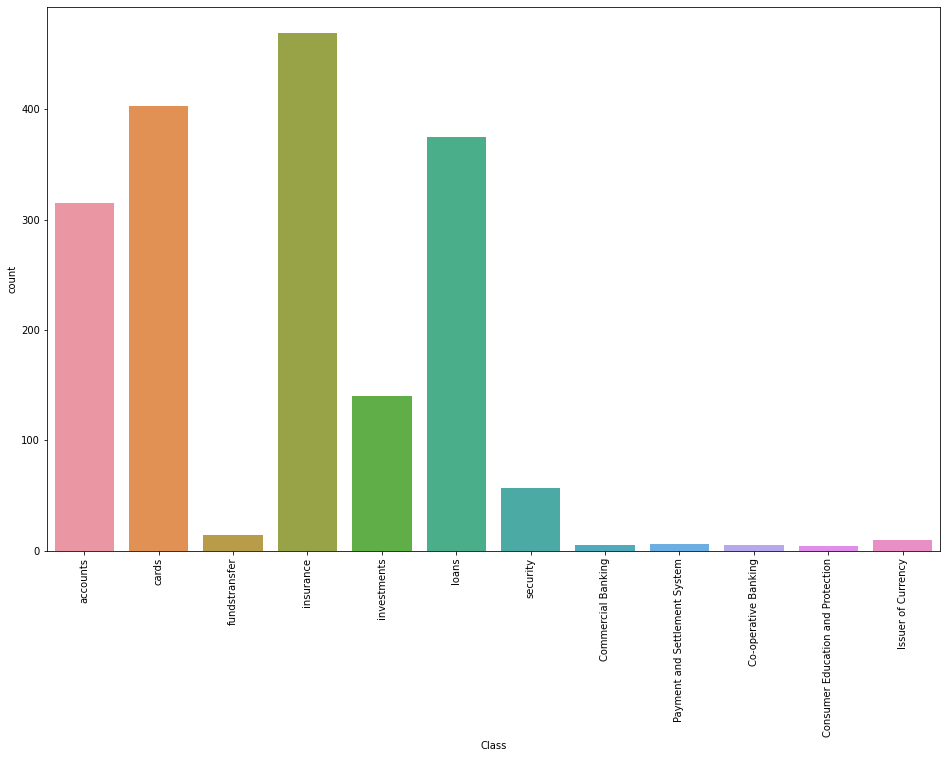

In [22]:
# Data is Clean, Lets jump to Visualization
# Count Plot for class
plt.figure(figsize = (16,10))
ax = sns.countplot(df_result['Class'])
plt.xticks(rotation=90)

In [23]:
# Feature Engineering process
df_result.drop_duplicates(inplace=True) # here we drop the duplicate row --> 1803 row - 1529 rows = 274 row drop by using drop_duplicate fun
df_result

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,accounts
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",accounts
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,accounts
3,What are the documents required for opening a ...,Following documents are required for opening a...,accounts
4,What documents are required to change the addr...,Following documents are required to change the...,accounts
...,...,...,...
1798,What is currency paper made up of?,The paper currently being used for printing of...,Issuer of Currency
1799,How many languages appear in the language pane...,Fifteen languages are appearing in the languag...,Issuer of Currency
1800,Is it possible to have two or more banknotes w...,"Yes, it is possible to have two or more bankno...",Issuer of Currency
1801,Who decides on the figure to be printed on a n...,"In terms of Section 25 of the RBI Act, the des...",Issuer of Currency


In [24]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
le = LabelEncoder() ## now treat "Class" columns 
df_result.le = df_result ## where we apply LE
df_result['Class'] = le.fit_transform(df_result['Class'])
df_result[:4]

,Question,Answer,Class
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,5
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",5
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,5
3,What are the documents required for opening a ...,Following documents are required for opening a...,5


In [25]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [26]:
# Let's take a look at the updated text
df_result['cleaned_Question'] = pd.DataFrame(df_result.Question.apply(cleaned1))
df_result['cleaned_Answer'] = pd.DataFrame(df_result.Answer.apply(cleaned1))
df_result[:3]

,Question,Answer,Class,cleaned_Question,cleaned_Answer
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,5,what are the documents required for opening a ...,following documents are required to open a cur...
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",5,can i transfer my current account from one bra...,yes current accounts can be transferred from o...
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,5,my present status is nri what extra documents ...,nripio can open the proprietorshippartnership ...


In [27]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [28]:
# Let's take a look at the updated text
df_result['cleaned_Question_new'] = pd.DataFrame(df_result['cleaned_Question'].apply(cleaned2))
df_result['cleaned_Answer_new'] = pd.DataFrame(df_result['cleaned_Answer'].apply(cleaned2))
df_result.head()

,Question,Answer,Class,cleaned_Question,cleaned_Answer,cleaned_Question_new,cleaned_Answer_new
0,What are the documents required for opening a ...,Following documents are required to open a Cur...,5,what are the documents required for opening a ...,following documents are required to open a cur...,what are the documents required for opening a ...,following documents are required to open a cur...
1,Can I transfer my Current Account from one bra...,"Yes, Current Accounts can be transferred from ...",5,can i transfer my current account from one bra...,yes current accounts can be transferred from o...,can i transfer my current account from one bra...,yes current accounts can be transferred from o...
2,My present status is NRI. What extra documents...,NRI/PIO can open the proprietorship/partnershi...,5,my present status is nri what extra documents ...,nripio can open the proprietorshippartnership ...,my present status is nri what extra documents ...,nripio can open the proprietorshippartnership ...
3,What are the documents required for opening a ...,Following documents are required for opening a...,5,what are the documents required for opening a ...,following documents are required for opening a...,what are the documents required for opening a ...,following documents are required for opening a...
4,What documents are required to change the addr...,Following documents are required to change the...,5,what documents are required to change the addr...,following documents are required to change the...,what documents are required to change the addr...,following documents are required to change the...


In [29]:
#Removing notuseful columns
df_result.drop(columns = ['Question', 'cleaned_Question','cleaned_Answer'], inplace = True)
df_result[:5]

,Answer,Class,cleaned_Question_new,cleaned_Answer_new
0,Following documents are required to open a Cur...,5,what are the documents required for opening a ...,following documents are required to open a cur...
1,"Yes, Current Accounts can be transferred from ...",5,can i transfer my current account from one bra...,yes current accounts can be transferred from o...
2,NRI/PIO can open the proprietorship/partnershi...,5,my present status is nri what extra documents ...,nripio can open the proprietorshippartnership ...
3,Following documents are required for opening a...,5,what are the documents required for opening a ...,following documents are required for opening a...
4,Following documents are required to change the...,5,what documents are required to change the addr...,following documents are required to change the...


In [30]:
df_result['cleaned_Question_new'].unique()

array(['what are the documents required for opening a current account of a sole proprietorship firm',
       'can i transfer my current account from one branch to another',
       'my present status is nri what extra documents are required for opening a sole proprietorship current account',
       ...,
       'is it possible to have two or more banknotes with the same serial number',
       'who decides on the figure to be printed on a new banknote',
       'are the banknotes issued by rbi backed by any assets such as gold'],
      dtype=object)

In [31]:
df_result['cleaned_Answer_new'].unique()

array(['following documents are required to open a current account of a sole proprietorship entity proof of existence in the name of firm proof of address in the name of firm kyc of the proprietor any two of the below listed documents shall be obtained for establishing proof of existence registration certificatelicense issued by municipal authorities such as shop  establishment certificatetrade license cstvatservice tax certificate or letter of registration for cstvatservice tax certificateregistration document issued by professional tax authorities valid business license or certificate of registration issued by statecentral government authority validity would include the grace period for renewal as mentioned in the certificate rbisebi registration certificate license issued by food and drug control authorities import  export certificate iec code issued by the director general of foreign trade documents for establishing proof of address landline telephone billelectricity bill of public

In [32]:
df_result['cleaned_Answer_new'][104]

'a cms â€  endtoend solution to your payment and collection requirements through our cash management services at extremely attractive rates  consistently voted â€œbest bank in cash management servicesâ€  cash management services are offered at over  locations b ecms   tailor made product offering for electronic collections  ease of reconciliation for your business  stp credit with real time notification  credit confirmation to the remitter  integrated mis offering â€ secure data transmission'

In [33]:
# here in the Question and answer column wome words are seperated by "", '', /, !, **, (), . so we have to clean them 
# removing the 'Ascii' characters
rep_chars = 'Ã|\¢|\â|\¬|\„|\€|\˜|\€™|\*|\Å|\Ë|\(|\)|\œ|\!|\"|\#|\$|\%|\&|\\|\™|\'|\+|\,|\-|\.|\/|\:|\;|\<|\=|\>|\?|\@|\^|\_|\`|\{|\|}|\~|\.'
#Ã|¢|â|¬|„|€|˜|€™|*|Å|Ë|œ
df_result['cleaned_Question_new'] = df_result['cleaned_Question_new'].str.replace(rep_chars,"")
df_result['cleaned_Answer_new'] = df_result['cleaned_Answer_new'].str.replace(rep_chars, "")

for index,text in enumerate(df_result['cleaned_Answer_new'][71:75]):
  print('cleaned_Answer_new %d:\n'%(index+1),text)

cleaned_Answer_new 1:
 a suitable choice of current account for your business and transaction needs  alliances for your startup  advisory services  coworking spaces  logistics  public relations  digital marketing services  content writing smartbuy accelerate your business with the right marketing channel at the right time get access to  million potential customers to accelerate your growth smartup portal  meet other startups customers mentors investors all by simply registering for the smartup program digital  cash management solutions forex advisory
cleaned_Answer_new 2:
 no minimum requirement of number of salary accounts and average salary to be more than rs   zero balance salary account free payable at par cheque book platinum debit card with higher limits for cash withdrawal at atms and usage at shopping outlets  corporate microsite whenever applicable  a customised webpage highlighting our offers for company™s employees at no cost  online investment and loan facility  cashback of

C:\Users\omgha\AppData\Local\Temp\ipykernel_13364\2647717005.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_result['cleaned_Question_new'] = df_result['cleaned_Question_new'].str.replace(rep_chars,"")
C:\Users\omgha\AppData\Local\Temp\ipykernel_13364\2647717005.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_result['cleaned_Answer_new'] = df_result['cleaned_Answer_new'].str.replace(rep_chars, "")


In [34]:
df_result['cleaned_Answer_new'][104] # here if we look at to the â€  'Ascii' characters replace by space

'a cms   endtoend solution to your payment and collection requirements through our cash management services at extremely attractive rates  consistently voted best bank in cash management services  cash management services are offered at over  locations b ecms   tailor made product offering for electronic collections  ease of reconciliation for your business  stp credit with real time notification  credit confirmation to the remitter  integrated mis offering  secure data transmission'

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omgha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words = set(stopwords.words("english"))
#print(stop_words)

In [37]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [38]:
wordnet = WordNetLemmatizer()
def text_preproc(x):
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

In [39]:
df_result['cleaned_Answer_new'] = df_result['cleaned_Answer_new'].apply(text_preproc)
df_result['cleaned_Question_new'] = df_result['cleaned_Question_new'].apply(text_preproc)
df_result.head()

,Answer,Class,cleaned_Question_new,cleaned_Answer_new
0,Following documents are required to open a Cur...,5,documents required opening current account sol...,following documents required open current acco...
1,"Yes, Current Accounts can be transferred from ...",5,transfer current account one branch another,yes current accounts transferred one branch an...
2,NRI/PIO can open the proprietorship/partnershi...,5,present status nri extra documents required op...,nripio open proprietorshippartnership firm sub...
3,Following documents are required for opening a...,5,documents required opening current account lim...,following documents required opening current a...
4,Following documents are required to change the...,5,documents required change address entity,following documents required change address en...


In [40]:
from sklearn.model_selection import train_test_split
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
Independent_var = df_result.cleaned_Question_new
Dependent_var = df_result.Class
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 100)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 1223
IV_test  : 306
DV_train : 1223
DV_test  : 306


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "saga")


from sklearn.pipeline import Pipeline

In [42]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 38,  0,  0,  0,  3,  1,  1],
       [ 0,  0,  0,  0,  1,  0, 70,  0,  1,  2,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  3,  0,  7,  3,  2, 83,  5,  5,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 23,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  8]], dtype=int64)

In [43]:
## Model prediciton
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8529411764705882
Precision :  0.9016208035126343
Recall :  0.8529411764705882


C:\Users\omgha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
tvec3 = TfidfVectorizer()
clf3 = svm.SVC(kernel='linear')

In [45]:
model1 = Pipeline([('vectorizer',tvec3),('classifier',clf3)])

model1.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model1.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  1, 41,  0,  0,  2,  3,  2,  1],
       [ 0,  0,  0,  0,  1,  0, 69,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  3,  3,  0, 80,  4,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0, 24,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1,  1, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0, 10]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8725490196078431
Precision :  0.9007814492243559
Recall :  0.8725490196078431


C:\Users\omgha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#by using SVM we get the best accuracy of 87% 

In [47]:
from flask import Flask, request, jsonify, render_template
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
import pandas as pd
import numpy as np

# Load the preprocessed data
df_result = pd.read_csv('df_result_ofdf1plusdf2_index.csv')

# Define the TD-IDF vectorizer and fit it to the data
tvec3 = TfidfVectorizer()
tvec3.fit(df_result['Question'].str.lower())

# Define the support vector machine model and fit it to the data
clf3 = SVC(kernel='linear')
clf3.fit(tvec3.transform(df_result['Question'].str.lower()), df_result['Class'])

# Define a function to get the answer to a given question
def get_answer(question):
    # Vectorize the question
    question_tdidf = tvec3.transform([question.lower()])
    
    # Calculate the cosine similarity between both vectors
    cosine_sims = cosine_similarity(question_tdidf, tvec3.transform(df_result['Question'].str.lower()))

    # Get the index of the most similar text to the query
    most_similar_idx = np.argmax(cosine_sims)

    # Get the predicted class of the query
    predicted_class = clf3.predict(question_tdidf)[0]
    
    # If the predicted class is not the same as the actual class, return an error message
    if predicted_class != df_result.iloc[most_similar_idx]['Class']:
        return {'error': 'Could not find an appropriate answer.'}
    
    # Get the answer and construct the response
    answer = df_result.iloc[most_similar_idx]['Answer']
    response = {
        'answer': answer,
        'predicted_class': predicted_class
    }
    
    return response


In [48]:
from flask import Flask, request, jsonify, render_template

# Create a Flask app
app = Flask(__name__,template_folder='template')

# Define the route for the chatbot web interface
@app.route('/')
def index():
    return render_template('bank.html')

# Define the API route for predicting answers
@app.route('/predict', methods=['POST'])
def predict():
    # Get the question from the request
    question = request.form['question']

    # Get the answer to the question
    response = get_answer(question)
    
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True,use_reloader=False
           )

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [49]:
# I created Flask API on local host http://127.0.0.1:5000/, 
# below Text displays on Web browser page and which returns answer as well

Welcome Chatbot Interface
How can I assist you?
Ask a question:
Details for insurance scheme

# answer
{"error":"Could not find an appropriate answer."} # http://127.0.0.1:5000/predict

SyntaxError: invalid syntax (1647298018.py, line 4)